In [18]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib


import rtmtools.lblrtm.aerutils as aerutils
importlib.reload(aerutils)
import rtmtools.clirad.sw.wrangle as cliradwrangle
importlib.reload(cliradwrangle)
import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle
importlib.reload(rrtmgwrangle)

import climatools.offline_scripts.intermodel as scripts_intermodel
importlib.reload(scripts_intermodel)


<module 'climatools.offline_scripts.intermodel' from '/nuwa_cluster/home/jackyu/climatools/climatools/offline_scripts/intermodel.py'>

In [2]:
name_molecule = 'H2O_CO2_O3' #r'$H_{2}O$'

In [3]:
#### Load CRD results

In [4]:
# Get lbl line-by-line results
pathout_crd = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples', 
                           'lbl_H2008_{name_molecule}_cut25'\
                           .format(name_molecule=name_molecule),
                           'OUTPUT_RADSUM')

#pathout_crd = '/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2008_h2O_cut25/OUTPUT_RADSUM'

pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd, 
                                                cooling_rate=True, 
                                                signed_fluxes=True)

print(pathout_crd)

/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2008_H2O_CO2_O3_cut25/OUTPUT_RADSUM


In [5]:
# H1996 cutoff = 10 cm-1
pathout_crd1 = os.path.join('/nuwa_cluster/home/jackyu',
                            'radiation/crd/LW/examples',
                            'lbl_H1996_{name_molecule}_cut10'\
                            .format(name_molecule=name_molecule),
                            'OUTPUT_RADSUM')

#pnl_crd1 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd1, 
#                                                 cooling_rate=True, 
#                                                 signed_fluxes=True)

#print(pathout_crd1)

In [6]:
#### Load CLIRAD results

In [7]:
# Read OUTPUT_CLIRAD.dat
pathout_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                              'radiation/clirad/LW/examples',
                              'mls75_{name_molecule}_H2012'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_CLIRAD.dat')

pnl_clirad = cliradwrangle.\
             OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad,
                                          cooling_rate=True, 
                                          signed_fluxes=True)

In [8]:
pathout_clirad_96 = os.path.join('/nuwa_cluster/home/jackyu',
                                 'radiation/clirad/LW/examples',
                                 'mls75_{name_molecule}'\
                                 .format(name_molecule=name_molecule),
                                 'OUTPUT_CLIRAD.dat')

#pnl_clirad_96 = cliradwrangle.\
#                OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad_96, 
#                                             cooling_rate=True,
#                                             signed_fluxes=True)

In [9]:
#### Load LBLRTM results

In [10]:
# Get AER line-by-line results
pathout_lblrtm = os.path.join('/nuwa_cluster/home/jackyu',
                              'line_by_line/aerlbl_v12.2_package',
                              'runs/LW/run_mls70pro_{name_molecule}'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_RADSUM')

pnl_lblrtm = aerutils.\
             OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_lblrtm, 
                                          signed_fluxes=True, 
                                          cooling_rate=True)

In [11]:
#### Load RRTMG results

In [12]:
pathout_rrtmg = os.path.join('/nuwa_cluster/home/jackyu',
                             'radiation/rrtmg/LW/examples',
                             'mls70_{name_molecule}'\
                             .format(name_molecule=name_molecule),
                             'OUTPUT_RRTM')

pnl_rrtmg = rrtmgwrangle.\
            OUTPUT_RRTM_to_pandasPanel(readfrom=pathout_rrtmg,
                                       signed_fluxes=True,
                                       cooling_rate = True)

# Whole spectral range

CRD
       pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.002417 -295.665287    0.000000 -295.665287      0.000000
30   299.800000 -312.472739   53.948982 -258.523757      2.307109
0   1013.000000 -423.662018  306.391961 -117.270058      1.341077

LBLRTM
     pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.0024 -294.276194    0.000000 -294.276194      0.000000
30   299.8000 -312.409394   54.434267 -257.975128      2.155532
0   1013.0000 -423.532488  306.303329 -117.229160      1.322007

RRTMG
      pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -293.4640     0.0000 -293.4640       0.00000
30   299.70000 -311.4119    54.0219 -257.3900       2.11845
0   1013.00000 -423.5981   307.6566 -115.9415       1.37746

CLIRAD
       pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.002417 -295.108436    0.013619 -295.094817     25.588815
30   299.800000 -312.492346   54.137694 -258.354652      2.270001
0   1013.000000

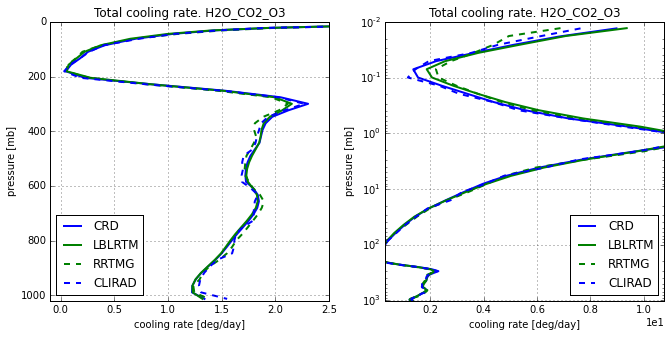

In [19]:
scripts_intermodel.lw_results_all_wavenumbers(
    infos_wavenumber=[('CRD', 'b', '-', pnl_crd),
                      ('LBLRTM', 'g', '-', pnl_lblrtm),
                      ('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_spectralband=[('CLIRAD', 'b', '--', pnl_clirad)],
    name_molecule=name_molecule)

In [16]:
html_download = ('<a href="./longwave_mls_{name_molecule}_total.xlsx"'
                 'download>longwave_mls_{name_molecule}_total.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In RRTMG's wavenumber bands

Flux tables and cooling rates in RRTMG spectral bands


RRTMG-LW. Spectral band 1. 10.0 ~ 350.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -36.3061     0.0000  -36.3061      -0.00000
30   299.70000 -38.7258    22.3568  -16.3690       1.36489
0   1013.00000 -54.5825    54.5778   -0.0047       0.00201

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -36.618217   0.000000 -36.618217      0.000000
30   299.800000 -38.842137  22.076937 -16.765200      1.442737
0   1013.000000 -54.573788  54.550693  -0.023095      0.008350

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -36.723309   0.000000 -36.723309      0.000000
30   299.8000 -38.985412  22.041837 -16.943575      1.331638
0   1013.0000 -54.581667  54.656243   0.074575      0.030403

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.312117   0.000000  0.312117     -0.000000
30 -0.100000  0.11

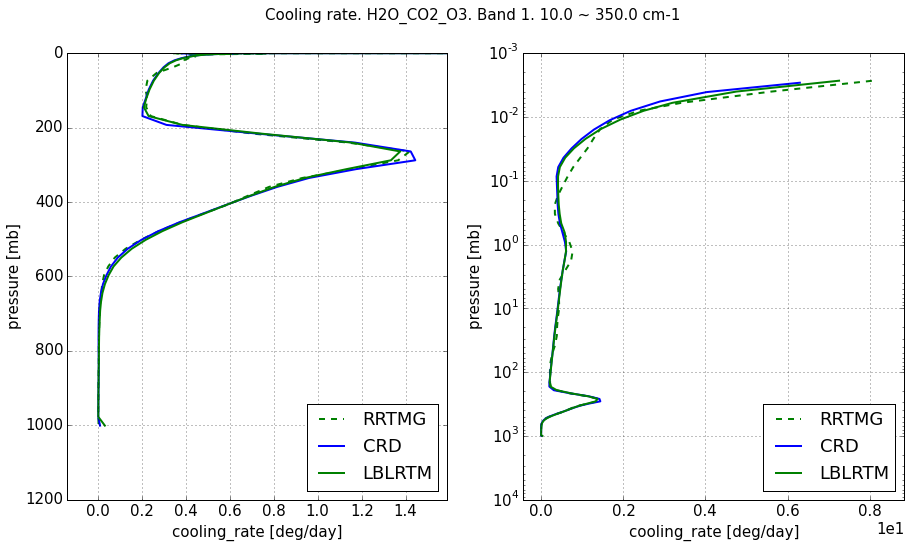


------------------------------------------------------------------------

RRTMG-LW. Spectral band 2. 350.0 ~ 500.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -44.3208     0.0000  -44.3208      -0.00000
30   299.70000 -45.1535     5.2688  -39.8847       0.46769
0   1013.00000 -60.9174    60.7515   -0.1659       0.05173

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -44.422872   0.000000 -44.422872      0.000000
30   299.800000 -45.270432   5.428132 -39.842299      0.522787
0   1013.000000 -60.916638  60.564831  -0.351806      0.065122

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -44.312100   0.000000 -44.312100      0.000000
30   299.8000 -45.185754   5.581854 -39.603900      0.506827
0   1013.0000 -60.917465  60.568613  -0.348852      0.074174

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.102072   0.000000  0.102072     -0.00000

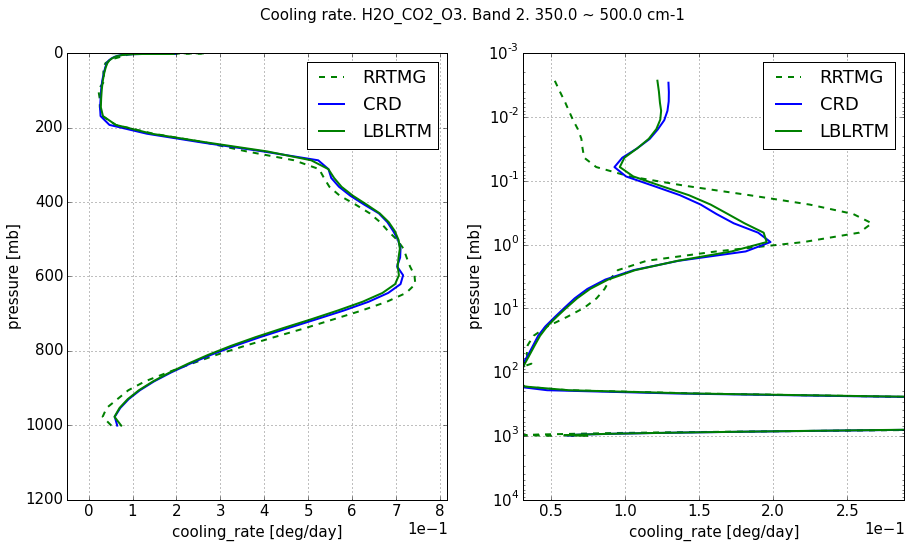


------------------------------------------------------------------------

RRTMG-LW. Spectral band 3. 500.0 ~ 630.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -41.7902     0.0000  -41.7902      -0.00000
30   299.70000 -43.5427     4.5282  -39.0145       0.15234
0   1013.00000 -58.6463    56.8235   -1.8228       0.25085

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -41.522534   0.000000 -41.522534      0.000000
30   299.800000 -43.395879   4.771101 -38.624778      0.181807
0   1013.000000 -58.652387  56.279587  -2.372799      0.236893

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -41.389559   0.000000 -41.389559      0.000000
30   299.8000 -43.300635   4.824984 -38.475650      0.180515
0   1013.0000 -58.646623  56.311786  -2.334837      0.236547

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.267666   0.000000 -0.267666     -0.00000

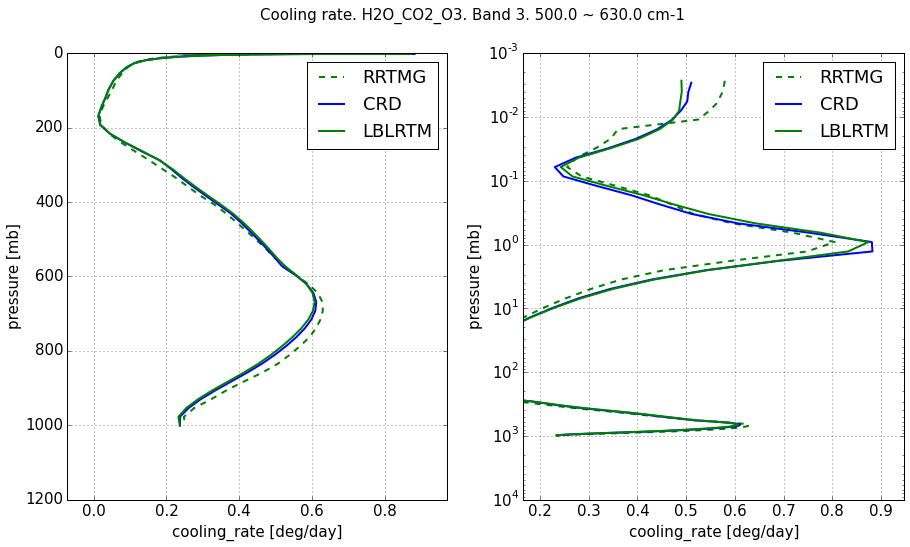


------------------------------------------------------------------------

RRTMG-LW. Spectral band 4. 630.0 ~ 700.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -11.9398     0.0000  -11.9398      -0.00000
30   299.70000 -14.5164    13.4973   -1.0191       0.04486
0   1013.00000 -30.8951    30.8533   -0.0418       0.01642

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -12.094158   0.000000 -12.094158      0.000000
30   299.800000 -14.485330  13.465687  -1.019643      0.045106
0   1013.000000 -30.901144  30.867650  -0.033493      0.011434

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -12.073474   0.000000 -12.073474      0.000000
30   299.8000 -14.560490  13.378687  -1.181803      0.042991
0   1013.0000 -30.895458  30.837079  -0.058378      0.012640

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.154358   0.000000  0.154358     -0.00000

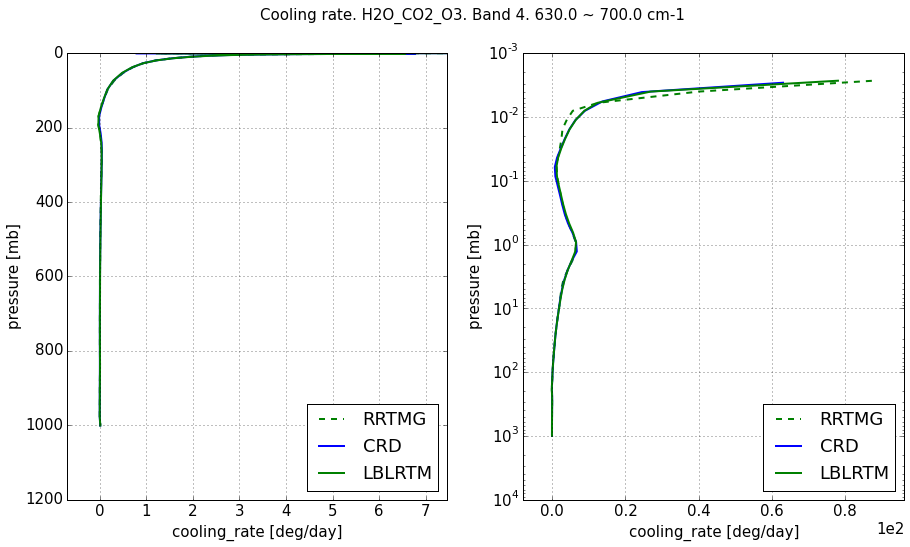


------------------------------------------------------------------------

RRTMG-LW. Spectral band 5. 700.0 ~ 820.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -36.0273     0.0000  -36.0273      -0.00000
30   299.70000 -38.3180     4.0313  -34.2867       0.05107
0   1013.00000 -48.8867    30.5347  -18.3520       0.30974

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -36.177944   0.000000 -36.177944      0.000000
30   299.800000 -38.257873   4.058243 -34.199629      0.062771
0   1013.000000 -48.899846  30.810699 -18.089147      0.292477

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -35.934255   0.000000 -35.934255      0.000000
30   299.8000 -38.412088   4.301510 -34.110578      0.053262
0   1013.0000 -48.886744  30.568545 -18.318199      0.290985

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.150644   0.000000  0.150644     -0.00000

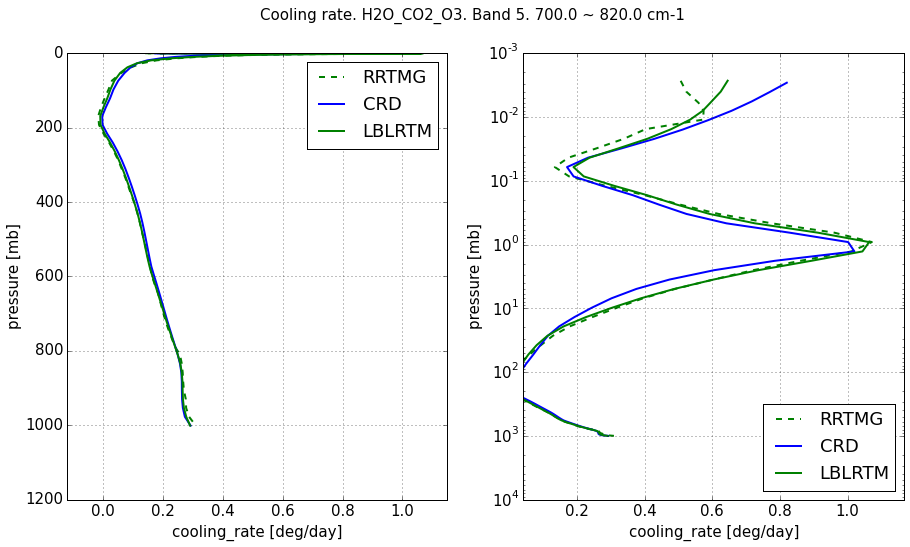


------------------------------------------------------------------------

RRTMG-LW. Spectral band 6. 820.0 ~ 980.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -52.7555     0.0000  -52.7555      -0.00000
30   299.70000 -52.8217     0.0256  -52.7961      -0.00159
0   1013.00000 -53.9607     6.8658  -47.0949       0.20026

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -52.786179   0.000000 -52.786179      0.000000
30   299.800000 -52.844195   0.027763 -52.816432     -0.001085
0   1013.000000 -53.981634   6.720210 -47.261424      0.191545

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -52.734423   0.000000 -52.734423      0.000000
30   299.8000 -52.817751   0.037897 -52.779854     -0.001169
0   1013.0000 -53.960338   6.673416 -47.286921      0.181611

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.030679   0.000000  0.030679     -0.00000

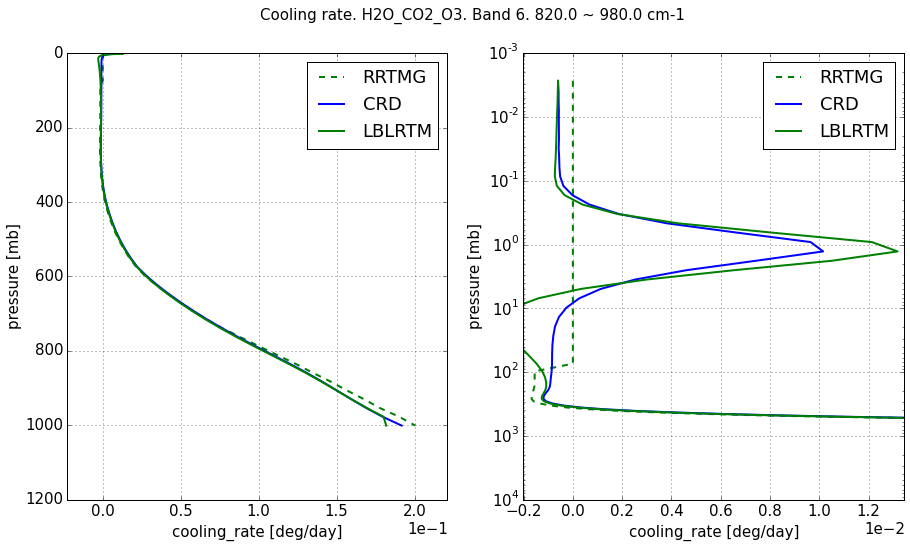


------------------------------------------------------------------------

RRTMG-LW. Spectral band 7. 980.0 ~ 1080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -17.8131     0.0000  -17.8131      -0.00000
30   299.70000 -24.0892     1.9958  -22.0934      -0.06302
0   1013.00000 -26.6402     6.4948  -20.1454       0.09753

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -18.173547   0.000000 -18.173547      0.000000
30   299.800000 -24.208244   2.038531 -22.169713     -0.058492
0   1013.000000 -26.654056   6.639731 -20.014326      0.092740

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -17.995492   0.000000 -17.995492      0.000000
30   299.8000 -24.214918   2.051020 -22.163899     -0.060282
0   1013.0000 -26.640246   6.600112 -20.040134      0.088446

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.360447   0.000000  0.360447     -0.0000

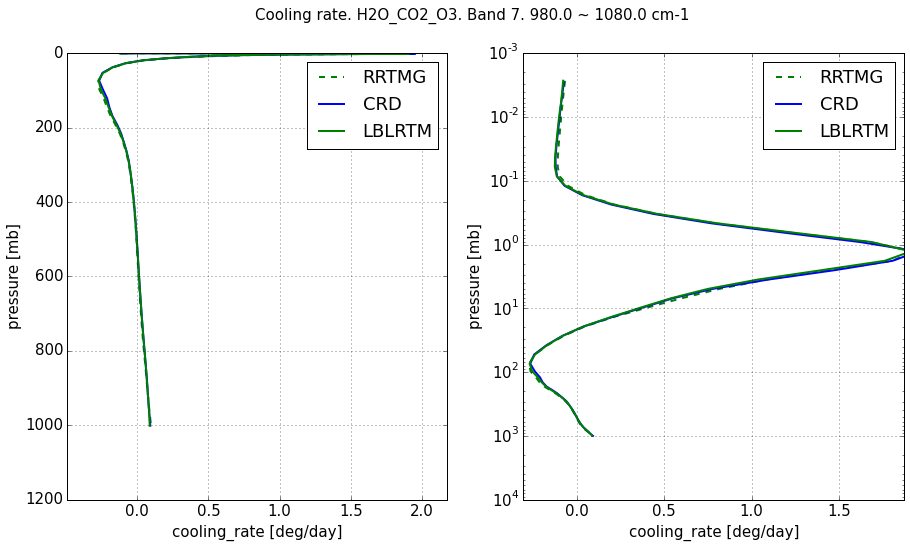


------------------------------------------------------------------------

RRTMG-LW. Spectral band 8. 1080.0 ~ 1180.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -20.0534     0.0000  -20.0534      -0.00000
30   299.70000 -20.4445     0.1380  -20.3065      -0.00208
0   1013.00000 -21.5225     4.7714  -16.7511       0.12455

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -20.328368   0.000000 -20.328368      0.000000
30   299.800000 -20.493355   0.052226 -20.441130     -0.000527
0   1013.000000 -21.535940   4.580523 -16.955417      0.118360

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -19.919407   0.000000 -19.919407      0.000000
30   299.8000 -20.458973   0.147303 -20.311670     -0.001432
0   1013.0000 -21.522739   4.660920 -16.861819      0.114346

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.274968   0.000000  0.274968     -0.000

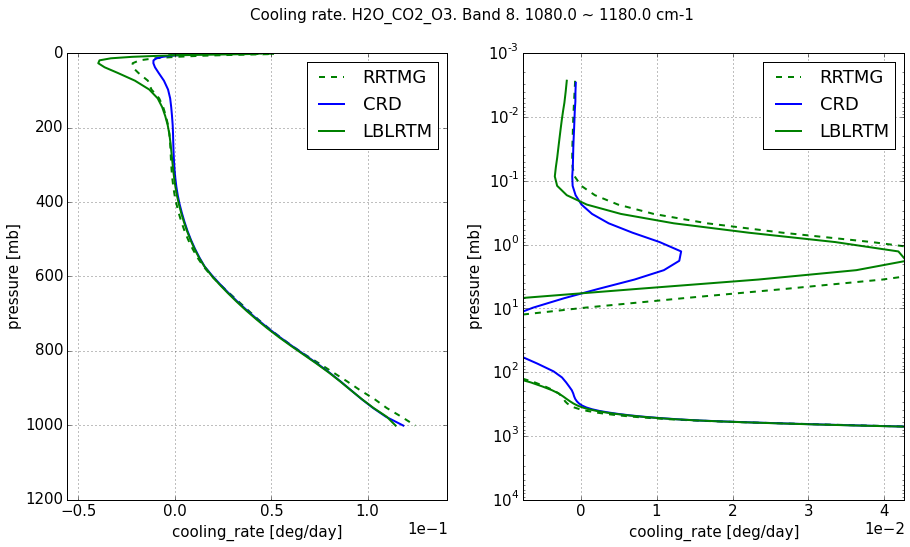


------------------------------------------------------------------------

RRTMG-LW. Spectral band 9. 1180.0 ~ 1390.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -22.0664     0.0000  -22.0664      -0.00000
30   299.70000 -22.3024     0.3088  -21.9936       0.01648
0   1013.00000 -31.2998    22.2084   -9.0914       0.25038

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -22.331858   0.000000 -22.331858      0.000000
30   299.800000 -22.502976   0.245861 -22.257115      0.013597
0   1013.000000 -31.323236  22.095176  -9.228060      0.246954

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -22.332966   0.000000 -22.332966      0.000000
30   299.8000 -22.521050   0.249872 -22.271177      0.012894
0   1013.0000 -31.299603  22.015530  -9.284073      0.247220

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.265458   0.000000  0.265458     -0.000

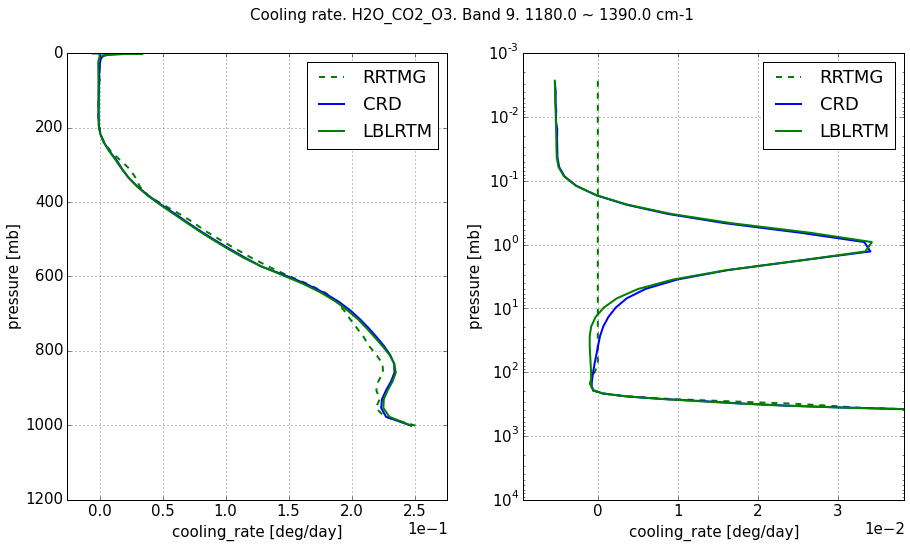


------------------------------------------------------------------------

RRTMG-LW. Spectral band 10. 1390.0 ~ 1480.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -2.4808     0.0000   -2.4808      -0.00000
30   299.70000  -2.7200     0.4662   -2.2538       0.02661
0   1013.00000  -8.8986     8.8866   -0.0120       0.00512

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -2.528982   0.000000 -2.528982      0.000000
30   299.800000 -2.762545   0.447686 -2.314859      0.027786
0   1013.000000 -8.906562   8.890356 -0.016206      0.005849

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -2.542765   0.000000 -2.542765      0.000000
30   299.8000 -2.778169   0.450300 -2.327869      0.026115
0   1013.0000 -8.898490   8.879339 -0.019150      0.004225

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.048182   0.000000  0.048182     -0.000000
30 -0.10000

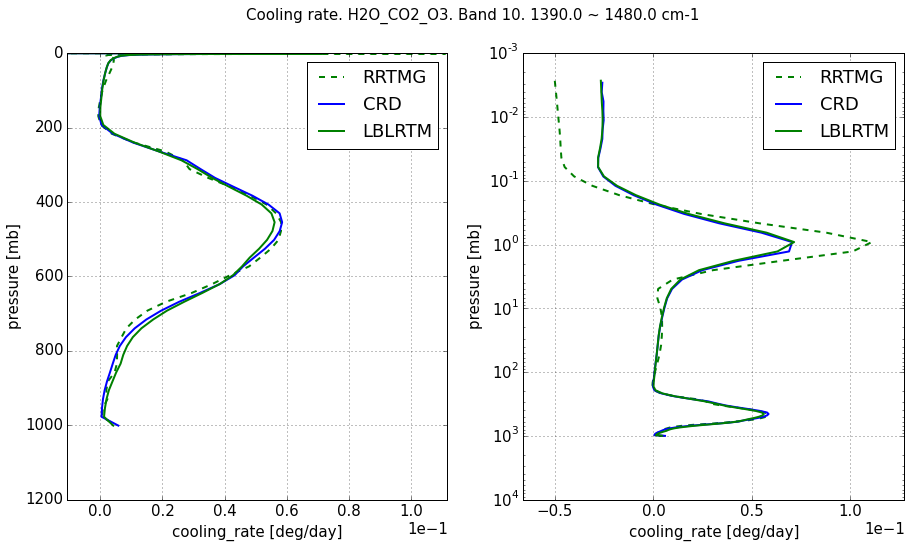


------------------------------------------------------------------------

RRTMG-LW. Spectral band 11. 1480.0 ~ 1800.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -3.2226     0.0000   -3.2226      -0.00000
30   299.70000  -3.8991     1.2651   -2.6340       0.06488
0   1013.00000 -17.8828    17.8685   -0.0143       0.00607

CRD
       pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.002417  -3.353829   0.000000 -3.353829      0.000000
30   299.800000  -3.996974   1.237523 -2.759451      0.071399
0   1013.000000 -17.902258  17.865359 -0.036899      0.013083

LBLRTM
     pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.0024  -3.360034   0.000000 -3.360034      0.000000
30   299.8000  -4.019504   1.250383 -2.769121      0.065555
0   1013.0000 -17.882889  17.851415 -0.031473      0.004635

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.131229   0.000000  0.131229     -0.000000
30 

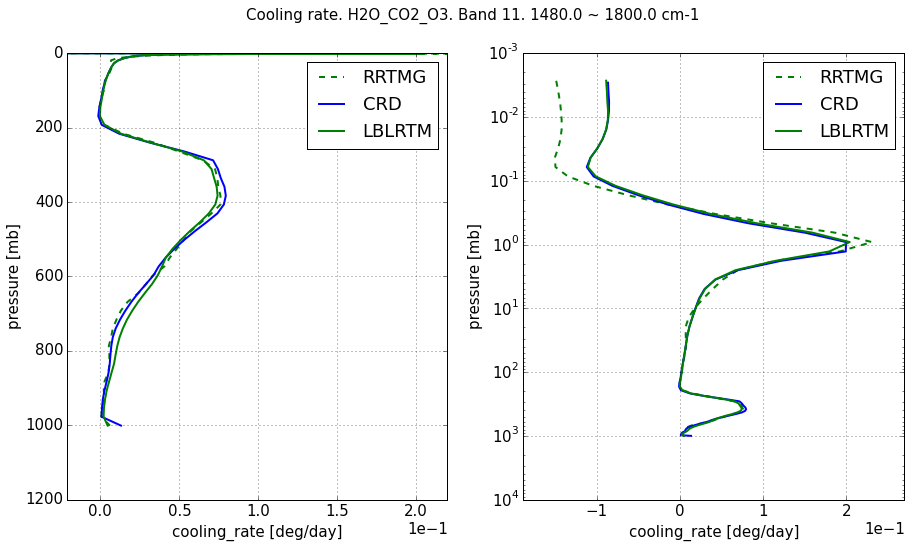


------------------------------------------------------------------------

RRTMG-LW. Spectral band 12. 1800.0 ~ 2080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -2.6369     0.0000   -2.6369      -0.00000
30   299.70000  -2.7157     0.0684   -2.6473      -0.00002
0   1013.00000  -5.9578     5.3168   -0.6410       0.04224

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -2.696757   0.000000 -2.696757      0.000000
30   299.800000 -2.775136   0.061014 -2.714122      0.000076
0   1013.000000 -5.965987   5.313618 -0.652369      0.038786

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -2.656291   0.000000 -2.656291      0.000000
30   299.8000 -2.747829   0.063251 -2.684578     -0.000001
0   1013.0000 -5.957771   5.237999 -0.719772      0.018733

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.059857   0.000000  0.059857     -0.000000
30 -0.10000

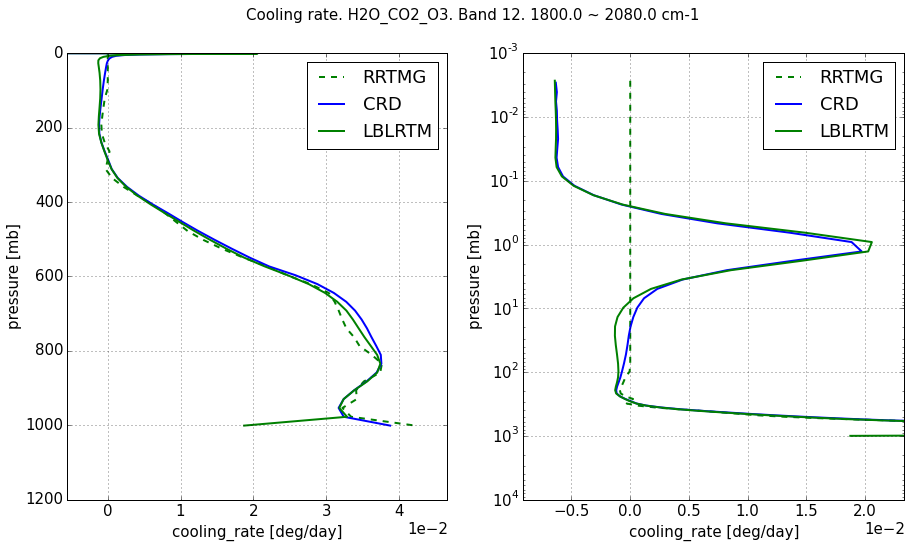


------------------------------------------------------------------------

RRTMG-LW. Spectral band 13. 2080.0 ~ 2250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -1.1115     0.0000   -1.1115      -0.00000
30   299.70000  -1.2232     0.0164   -1.2068      -0.00245
0   1013.00000  -1.6390     0.6522   -0.9868       0.01433

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -1.436399   0.000000 -1.436399      0.000000
30   299.800000 -1.447322   0.001156 -1.446166     -0.000439
0   1013.000000 -1.641655   0.478265 -1.163390      0.013815

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -1.228033   0.000000 -1.228033      0.000000
30   299.8000 -1.333964   0.009081 -1.324883     -0.001230
0   1013.0000 -1.639014   0.607295 -1.031719      0.014632

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.324899   0.000000  0.324899     -0.000000
30 -0.10000

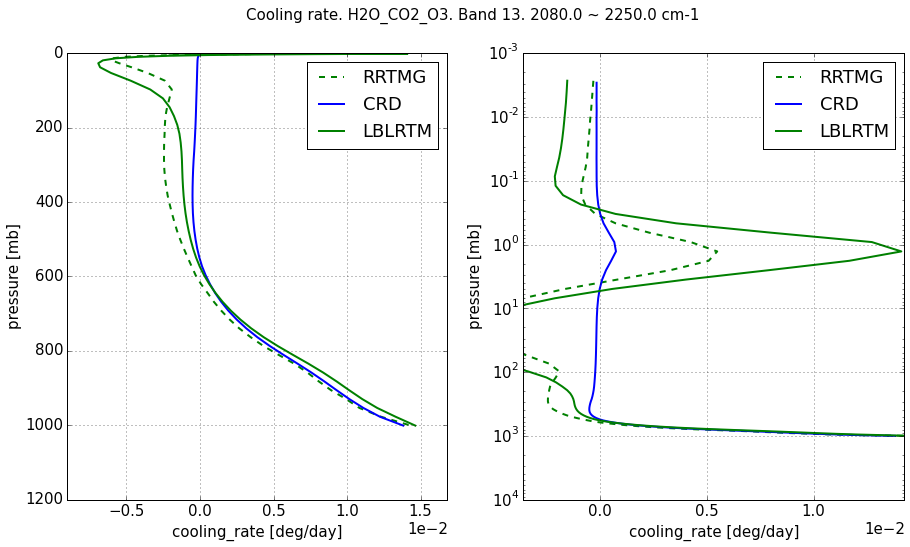


------------------------------------------------------------------------

RRTMG-LW. Spectral band 14. 2250.0 ~ 2380.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.0762     0.0000   -0.0762      -0.00000
30   299.70000  -0.0517     0.0513   -0.0004      -0.00001
0   1013.00000  -0.7316     0.7314   -0.0002       0.00008

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.228855   0.000000 -0.228855      0.000000
30   299.800000 -0.220079   0.034873 -0.185206     -0.000206
0   1013.000000 -0.732844   0.572768 -0.160076      0.002017

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.060054   0.000000 -0.060054      0.000000
30   299.8000 -0.061759   0.045021 -0.016739     -0.000337
0   1013.0000 -0.731556   0.724778 -0.006778      0.001245

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.152655   0.000000  0.152655     -0.000000
30 -0.10000

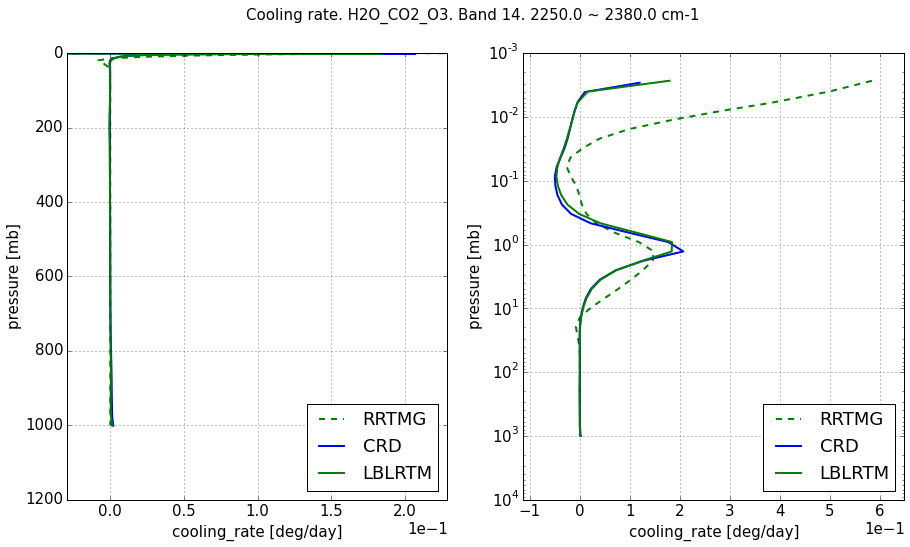


------------------------------------------------------------------------

RRTMG-LW. Spectral band 15. 2380.0 ~ 2600.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.4966     0.0000   -0.4966      -0.00000
30   299.70000  -0.5201     0.0037   -0.5164      -0.00107
0   1013.00000  -0.6658     0.1683   -0.4975       0.00318

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.595030   0.000000 -0.595030      0.000000
30   299.800000 -0.600106   0.002205 -0.597902     -0.000173
0   1013.000000 -0.667119   0.083955 -0.583164      0.001097

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.646132   0.000000 -0.646132      0.000000
30   299.8000 -0.642393   0.001201 -0.641192      0.000225
0   1013.0000 -0.665840   0.033080 -0.632760     -0.000042

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.098430   0.000000  0.098430     -0.000000
30 -0.10000

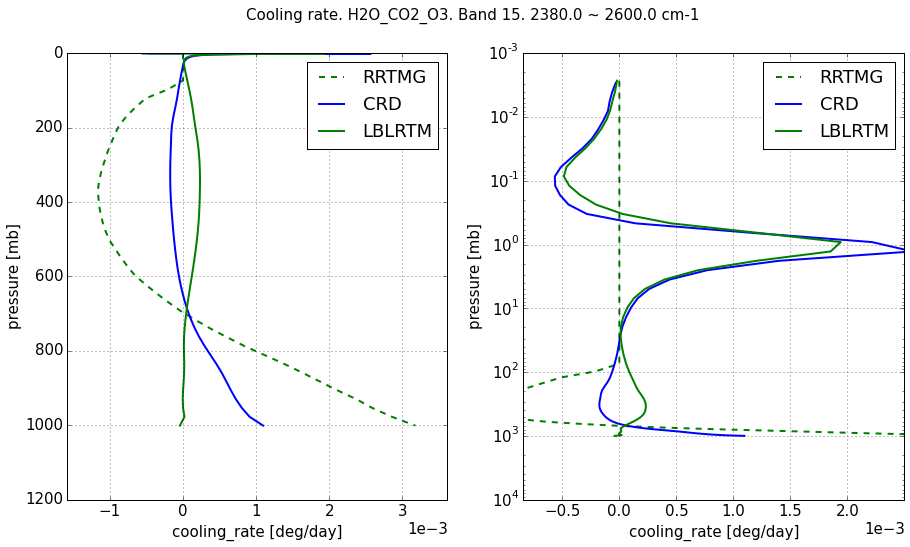


------------------------------------------------------------------------

RRTMG-LW. Spectral band 16. 2600.0 ~ 3250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.3668     0.0000   -0.3668      -0.00000
30   299.70000  -0.3679     0.0002   -0.3677      -0.00013
0   1013.00000  -0.4713     0.1516   -0.3197       0.00297

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.367404   0.000000 -0.367404      0.000000
30   299.800000 -0.367797   0.000024 -0.367773     -0.000039
0   1013.000000 -0.404431   0.076238 -0.328193      0.002539

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.365303   0.000000 -0.365303      0.000000
30   299.8000 -0.366100   0.000036 -0.366064     -0.000039
0   1013.0000 -0.403547   0.075602 -0.327945      0.002114

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.000604   0.000000  0.000604     -0.000000
30 -0.10000

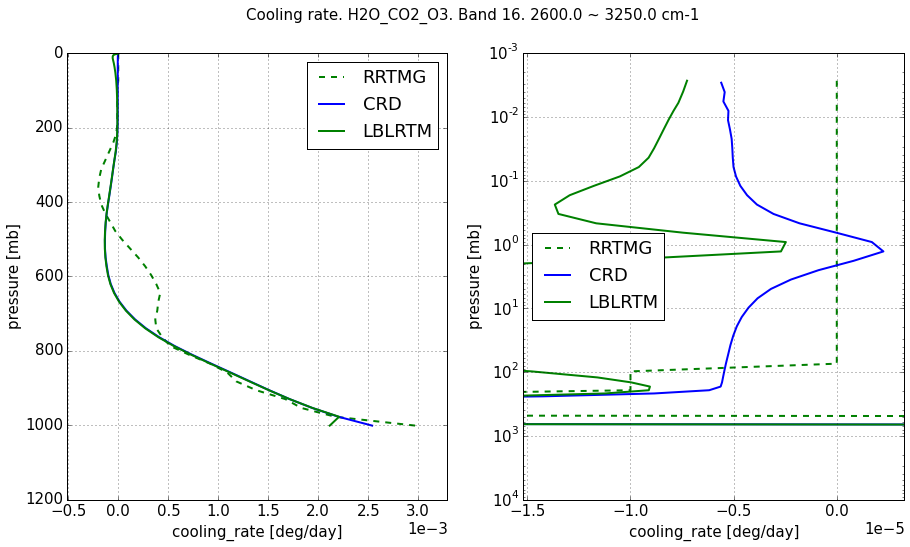


------------------------------------------------------------------------



In [17]:
print('Flux tables and cooling rates in RRTMG spectral bands')
print()
print()

scripts_intermodel.lw_results_by_rrtmg_bands(
    infos_rrtmg=[('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd), 
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [18]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In CLIRAD's wavenumber bands

Flux tables and cooling rates in CLIRAD spectral bands


CLIRAD-LW Spectral band 1. 0 ~ 340 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -34.03330   0.001232 -34.032068      6.148719
30   299.800000 -36.40643  21.663380 -14.743050      1.350754
0   1013.000000 -51.09213  51.070570  -0.021560      0.007725

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -34.310935   0.000000 -34.310935      0.000000
30   299.800000 -36.441826  21.391389 -15.050437      1.376942
0   1013.000000 -51.093040  51.071508  -0.021532      0.007733

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -34.414195   0.000000 -34.414195      0.000000
30   299.8000 -36.581570  21.338424 -15.243146      1.268608
0   1013.0000 -51.100657  51.173330   0.072673      0.029632

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.277635   0.001232  0.278867      6.148719
30      

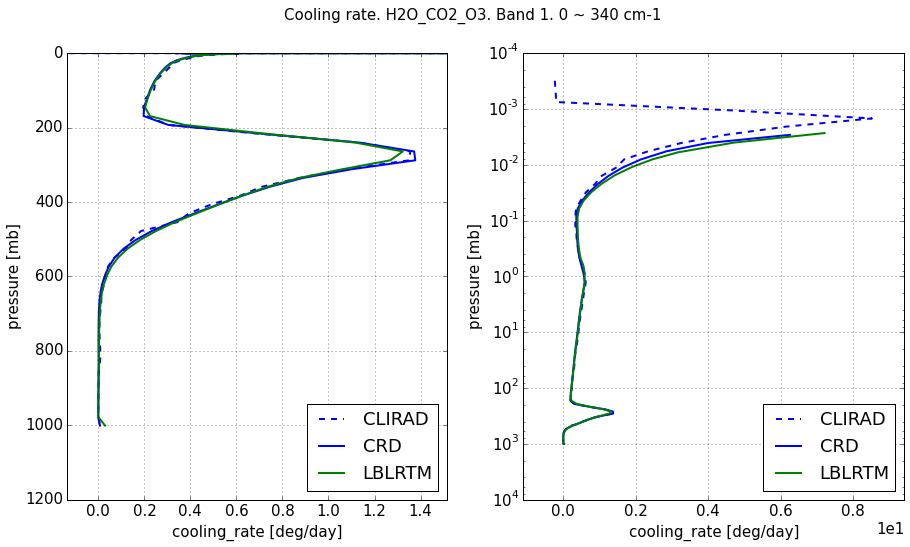


------------------------------------------------------------------------

CLIRAD-LW Spectral band 2. 340 ~ 540 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -59.82235   0.000003 -59.822347     -0.097136
30   299.800000 -60.99290   6.915163 -54.077737      0.649110
0   1013.000000 -82.31579  81.543440  -0.772350      0.156217

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -60.528548   0.000000 -60.528548      0.000000
30   299.800000 -61.592658   6.658546 -54.934111      0.644337
0   1013.000000 -82.315835  81.336060  -0.979775      0.130558

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -60.315887   0.000000 -60.315887      0.000000
30   299.8000 -61.416353   6.875811 -54.540542      0.627860
0   1013.0000 -82.315849  81.379641  -0.936208      0.138696

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.706198   0.000003  0.706201   

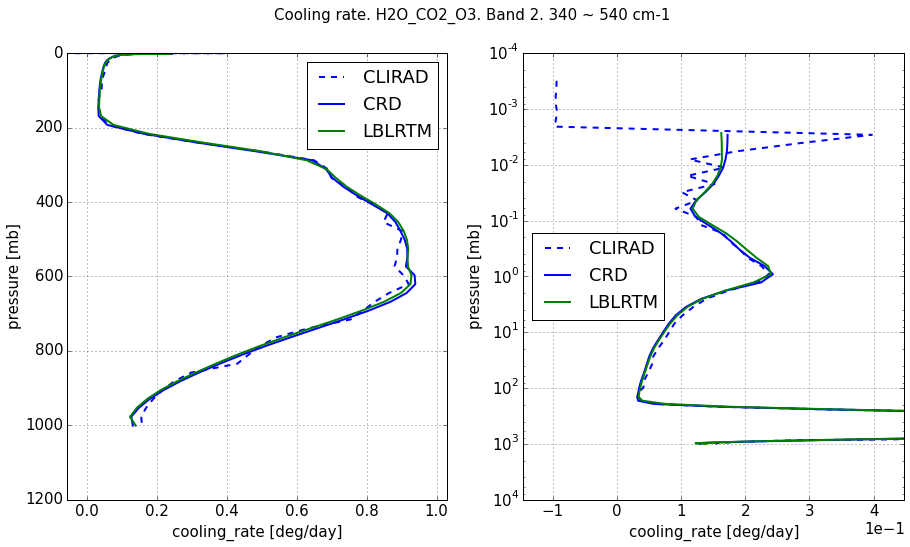


------------------------------------------------------------------------

CLIRAD-LW Spectral band 3. 540 ~ 800 cm-1

CLIRAD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417  -68.96323   0.012381 -68.950849     19.811190
30   299.800000  -74.97459  21.326890 -53.647700      0.216908
0   1013.000000 -112.81600  98.637690 -14.178310      0.521221

CRD
       pressure     flux_up  flux_down   net_flux  cooling_rate
70     0.002417  -68.646451   0.000000 -68.646451      0.000000
30   299.800000  -74.846726  21.737563 -53.109162      0.234086
0   1013.000000 -112.837813  98.763525 -14.074288      0.429695

LBLRTM
     pressure     flux_up  flux_down   net_flux  cooling_rate
70     0.0024  -68.356850   0.000000 -68.356850      0.000000
30   299.8000  -75.072195  21.898464 -53.173731      0.218940
0   1013.0000 -112.816764  98.520101 -14.296663      0.432358

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.316779   0.012381 

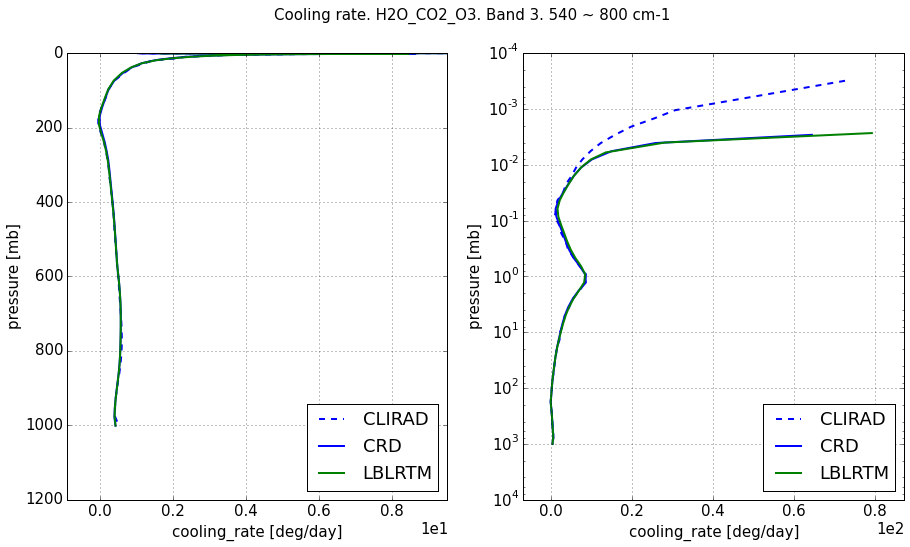


------------------------------------------------------------------------

CLIRAD-LW Spectral band 4. 800 ~ 980 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -59.98326  4.420017e-08 -59.983260     -0.000433
30   299.800000 -60.03240  2.851227e-02 -60.003888     -0.001018
0   1013.000000 -61.64931  9.531820e+00 -52.117490      0.258610

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -60.138326   0.000000 -60.138326      0.000000
30   299.800000 -60.216994   0.040386 -60.176607     -0.001240
0   1013.000000 -61.681243   8.624879 -53.056364      0.237852

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -60.082786   0.000000 -60.082786      0.000000
30   299.8000 -60.194616   0.054099 -60.140517     -0.001343
0   1013.0000 -61.657526   8.544186 -53.113340      0.225766

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.155066  4.42001

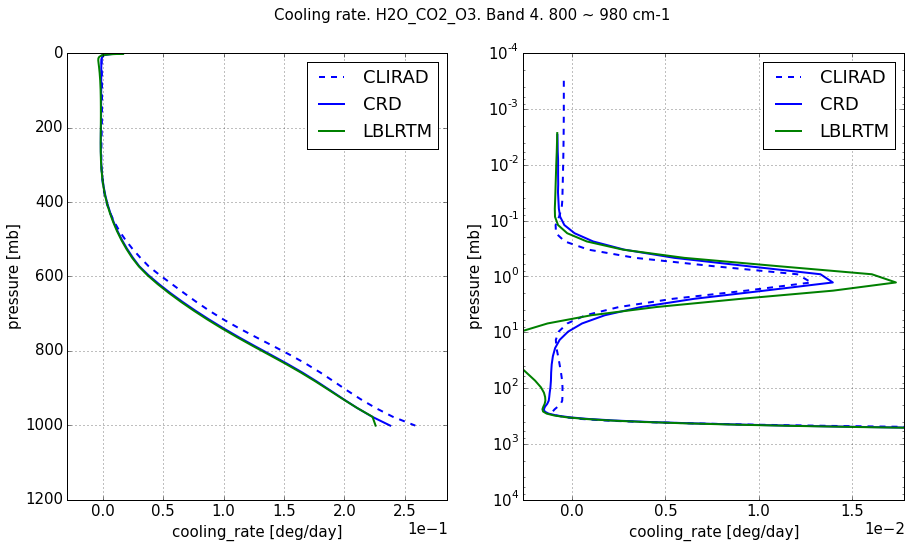


------------------------------------------------------------------------

CLIRAD-LW Spectral band 5. 980 ~ 1100 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -21.98282  4.965726e-07 -21.982820     -0.107922
30   299.800000 -28.64518  2.193509e+00 -26.451671     -0.056931
0   1013.000000 -31.34389  7.977093e+00 -23.366797      0.121466

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -22.568080   0.000000 -22.568080      0.000000
30   299.800000 -28.760681   2.083804 -26.676877     -0.059131
0   1013.000000 -31.354231   7.295534 -24.058697      0.109423

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -22.386854   0.000000 -22.386854      0.000000
30   299.8000 -28.765391   2.095539 -26.669853     -0.060905
0   1013.0000 -31.337711   7.259034 -24.078677      0.104785

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.585260  4.9657

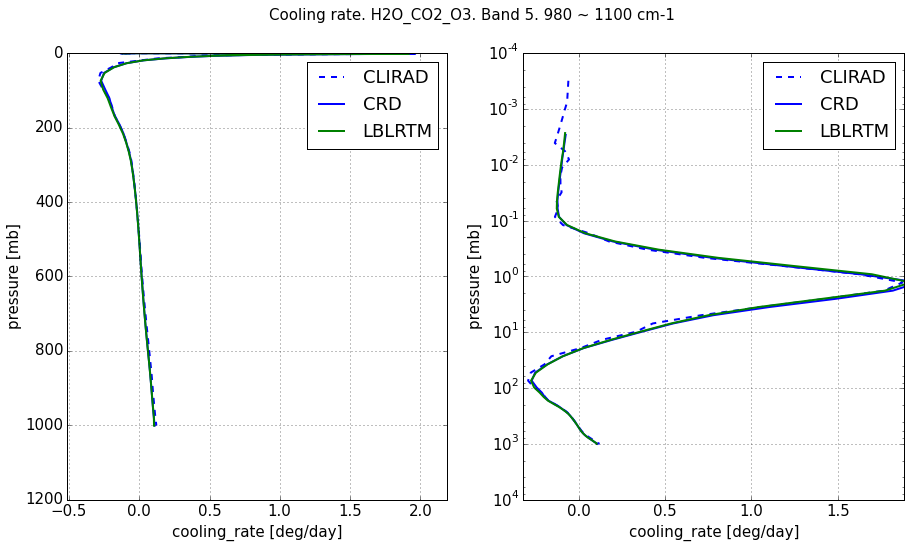


------------------------------------------------------------------------

CLIRAD-LW Spectral band 6. 1100 ~ 1215 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -21.79535  2.657388e-13 -21.795350 -3.024772e-09
30   299.800000 -21.80484  8.713370e-03 -21.796127  9.956238e-05
0   1013.000000 -23.27341  6.326471e+00 -16.946939  1.579750e-01

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -21.772813   0.000000 -21.772813      0.000000
30   299.800000 -21.785274   0.012782 -21.772491      0.000305
0   1013.000000 -23.269652   6.306189 -16.963463      0.160483

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -21.342054   0.000000 -21.342054      0.000000
30   299.8000 -21.743209   0.112815 -21.630393     -0.000665
0   1013.0000 -23.254791   6.403404 -16.851387      0.155982

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.022537  2.657

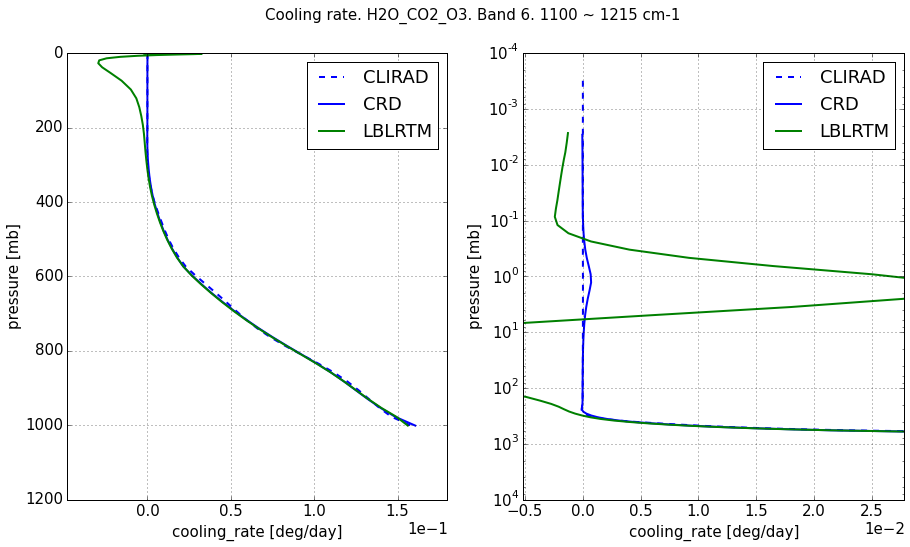


------------------------------------------------------------------------

CLIRAD-LW Spectral band 7. 1215 ~ 1380 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -16.32561  4.906120e-10 -16.325610 -6.565916e-07
30   299.800000 -16.46534  2.195141e-01 -16.245826  1.407870e-02
0   1013.000000 -23.74060  1.784015e+01  -5.900450  2.084762e-01

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -16.035589   0.000000 -16.035589      0.000000
30   299.800000 -16.184856   0.212737 -15.972118      0.011741
0   1013.000000 -23.755165  18.582951  -5.172214      0.186966

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -16.053864   0.000000 -16.053864      0.000000
30   299.8000 -16.205127   0.213334 -15.991793      0.011233
0   1013.0000 -23.736876  18.487027  -5.249849      0.187450

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.290021  4.906

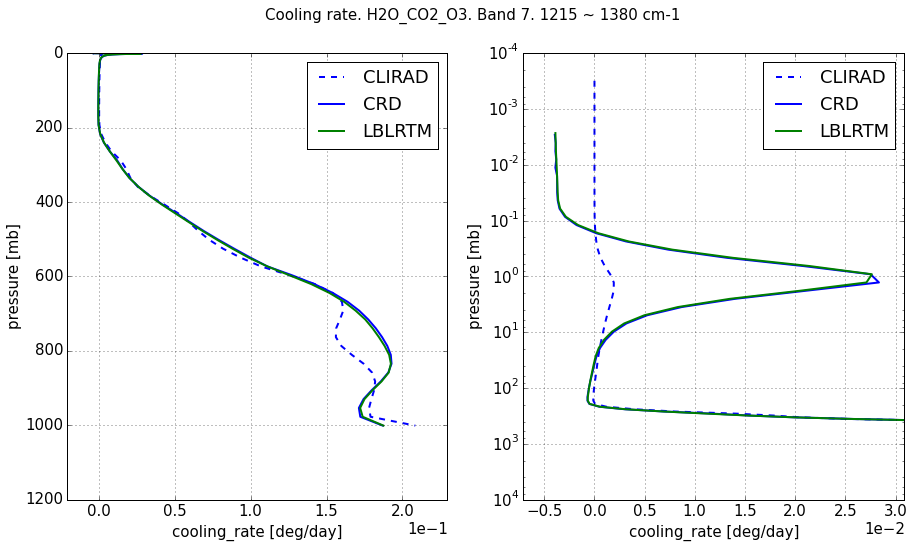


------------------------------------------------------------------------

CLIRAD-LW Spectral band 8. 1380 ~ 1900 cm-1

CLIRAD
       pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.002417  -7.341434   0.000002 -7.341432     -0.165602
30   299.800000  -8.295568   1.769966 -6.525602      0.097178
0   1013.000000 -30.880560  30.708790 -0.171770      0.059902

CRD
       pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.002417  -7.262541   0.000000 -7.262541      0.000000
30   299.800000  -8.190465   1.754848 -6.435618      0.102030
0   1013.000000 -30.729595  30.641071 -0.088524      0.027165

LBLRTM
     pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.0024  -7.297884   0.000000 -7.297884      0.000000
30   299.8000  -8.245298   1.770617 -6.474681      0.094301
0   1013.0000 -30.697533  30.597020 -0.100513      0.019153

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.078893   0.000002 -0.078891     -0.1

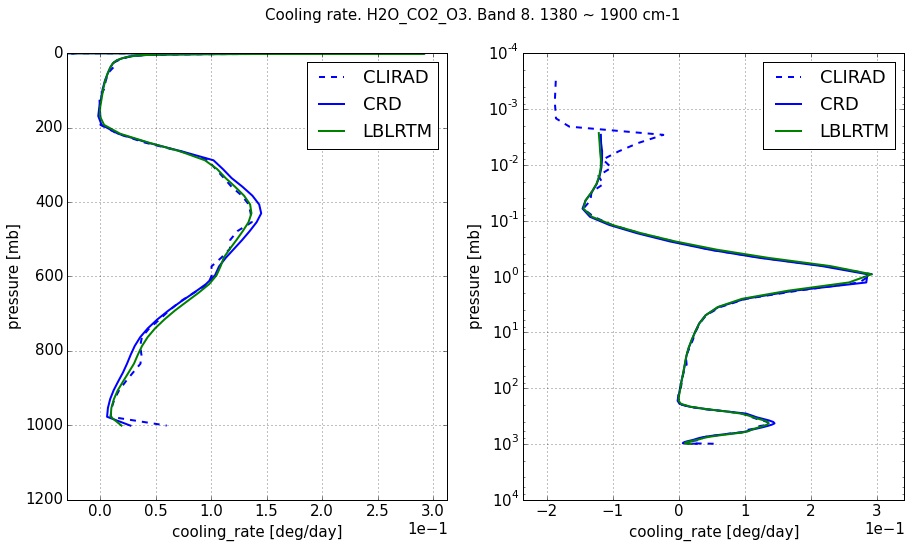


------------------------------------------------------------------------

CLIRAD-LW Spectral band 9. 1900 ~ 3000 cm-1

CLIRAD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -4.861082   0.000000 -4.861082     -0.000000
30   299.800000 -4.875098   0.012047 -4.863051     -0.000178
0   1013.000000 -6.674498   3.427002 -3.247496      0.060868

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -4.402004   0.000000 -4.402004      0.000000
30   299.800000 -4.453260   0.056926 -4.396334     -0.001962
0   1013.000000 -6.625445   3.770242 -2.855203      0.051202

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -4.025821   0.000000 -4.025821      0.000000
30   299.8000 -4.185635   0.075163 -4.110471     -0.002496
0   1013.0000 -6.614782   3.939586 -2.675196      0.028186

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.459078   0.000000 -0.459078     -0.000000
30    

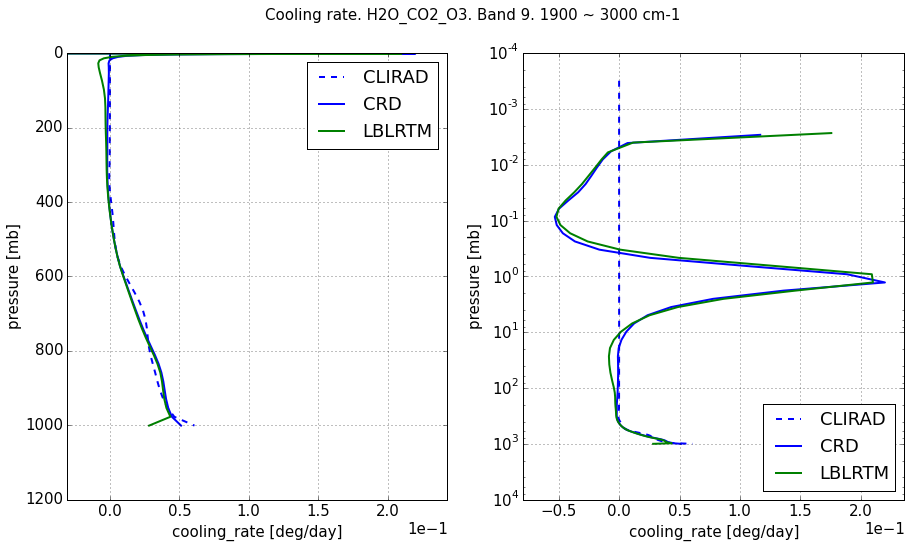


------------------------------------------------------------------------

CLIRAD-LW Spectral band 10. 540 ~ 620 cm-1

CLIRAD
       pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.002417       -0          0         0            -0
30   299.800000       -0          0         0            -0
0   1013.000000       -0          0         0            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -25.557881   0.000000 -25.557881      0.000000
30   299.800000 -26.837053   3.061298 -23.775755      0.103920
0   1013.000000 -36.235420  34.534637  -1.700784      0.164543

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -25.539419   0.000000 -25.539419      0.000000
30   299.8000 -26.832591   3.044669 -23.787921      0.101577
0   1013.0000 -36.231410  34.549704  -1.681706      0.163317

CLIRAD - CRD
    pressure    flux_up  flux_down   net_flux  cooling_rate
70         0  25.557881   0.000000  25.557881     -

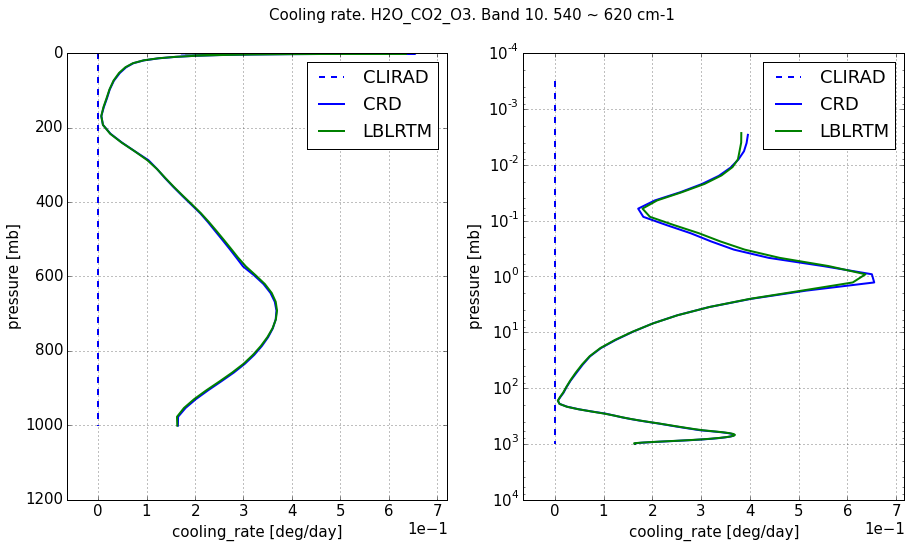


------------------------------------------------------------------------



In [19]:
print('Flux tables and cooling rates in CLIRAD spectral bands')
print()
print()

scripts_intermodel.lw_results_by_cliard_bands(
    infos_clirad=[('CLIRAD', 'b', '--', pnl_clirad)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd),
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [20]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

In [21]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')